In [3]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/drive/My Drive/FINAL PROJECT/For_Segmentation.csv')
df.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New
2,2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing
3,3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New
4,4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New


In [6]:
df.shape

(100486, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100486 entries, 0 to 100485
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     100486 non-null  int64  
 1   order_id                       100486 non-null  object 
 2   customer_id                    100486 non-null  object 
 3   product_id                     100486 non-null  object 
 4   total_money                    100486 non-null  float64
 5   product_category_name_english  100486 non-null  object 
 6   customer_unique_id             100486 non-null  object 
 7   order_status                   100486 non-null  object 
 8   order_purchase_timestamp       100486 non-null  object 
 9   review_score                   100486 non-null  int64  
 10  order_purchase_quarter         100486 non-null  int64  
 11  min_order_purchase_timestamp   100486 non-null  object 
 12  min_order_purchase_quarter    

In [7]:
rev_mean=df.groupby('customer_unique_id')['review_score'].mean().reset_index()
rev_mean

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0
...,...,...
93659,fffcf5a5ff07b0908bd4e2dbc735a684,5.0
93660,fffea47cd6d3cc0a88bd621562a9d061,4.0
93661,ffff371b4d645b6ecea244b27531430a,5.0
93662,ffff5962728ec6157033ef9805bacc48,5.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df.shape

(100486, 14)

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [ ]:
df_user = pd.DataFrame(df['customer_unique_id'].unique())
df_user = df_user.rename(columns={0:'customer_unique_id'})
#df_user

In [ ]:
df_max_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
df_max_purchase = df_max_purchase.rename(columns={'order_purchase_timestamp':'max_order_purchase_timestamp'})
df_max_purchase

,customer_unique_id,max_order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93659,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93660,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93661,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93662,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


## Recency

In [ ]:
df_max_purchase['recency'] = (df_max_purchase['max_order_purchase_timestamp'].max()-df_max_purchase['max_order_purchase_timestamp']).dt.days
#df_max_purchase

In [ ]:
df_user = pd.merge(df_user, df_max_purchase[['customer_unique_id','recency']], on='customer_unique_id')
df_user

,customer_unique_id,recency
0,871766c5855e863f6eccc05f988b23cb,355
1,eb28e67c4c0b83846050ddfb8a35d051,349
2,3818d81c6709e39d06b2738a8d3a2474,231
3,af861d436cfc08b2c2ddefd0ba074622,25
4,64b576fb70d441e8f1b2d7d446e483c5,575
...,...,...
93659,0c9aeda10a71f369396d0c04dce13a64,132
93660,0da9fe112eae0c74d3ba1fe16de0988b,50
93661,cd79b407828f02fdbba457111c38e4c4,314
93662,eb803377c9315b564bdedad672039306,384


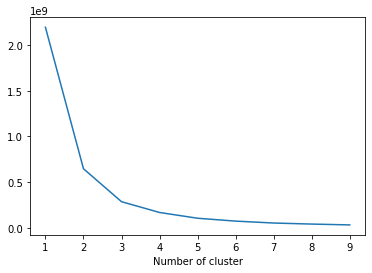

In [ ]:
from sklearn.cluster import KMeans

sse={}
df_recency = df_user[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#build 5 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['recency']])
df_user['recency_cluster'] = kmeans.predict(df_user[['recency']])

In [ ]:
df_user

,customer_unique_id,recency,recency_cluster
0,871766c5855e863f6eccc05f988b23cb,355,4
1,eb28e67c4c0b83846050ddfb8a35d051,349,4
2,3818d81c6709e39d06b2738a8d3a2474,231,0
3,af861d436cfc08b2c2ddefd0ba074622,25,3
4,64b576fb70d441e8f1b2d7d446e483c5,575,1
...,...,...,...
93659,0c9aeda10a71f369396d0c04dce13a64,132,2
93660,0da9fe112eae0c74d3ba1fe16de0988b,50,3
93661,cd79b407828f02fdbba457111c38e4c4,314,0
93662,eb803377c9315b564bdedad672039306,384,4


In [ ]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('recency_cluster', 'recency',df_user,False)

In [ ]:
df_user

,customer_unique_id,recency,recency_cluster
0,871766c5855e863f6eccc05f988b23cb,355,1
1,eb28e67c4c0b83846050ddfb8a35d051,349,1
2,f5f088001070650f9e9a8cd773621f35,386,1
3,e883f26917e2095c439f70c2cf8c914b,356,1
4,13df7b623839b4edc579ee40279d57c8,393,1
...,...,...,...
93659,a969e99358a58bed2f4073fd04165a2b,187,3
93660,66cd6da20c67f83a9cf37e01a0105812,188,3
93661,028c09f007292c4e3a3b10d296e47987,169,3
93662,6b42acb204802253acec6607ff3a9e0b,156,3


In [ ]:
df_user.groupby('recency_cluster')['recency'].mean()

recency_cluster
0    515.684773
1    382.777159
2    264.568193
3    156.423559
4     52.064362
Name: recency, dtype: float64

## Frequency

In [ ]:


df_freq=df.groupby('customer_unique_id')['order_purchase_timestamp'].count().reset_index()
df_freq=df_freq.rename(columns={'order_purchase_timestamp':'frequency'})

In [ ]:
df_user = pd.merge(df_user,df_freq,on='customer_unique_id')
df_user

,customer_unique_id,recency,recency_cluster,frequency
0,871766c5855e863f6eccc05f988b23cb,355,1,1
1,eb28e67c4c0b83846050ddfb8a35d051,349,1,2
2,f5f088001070650f9e9a8cd773621f35,386,1,1
3,e883f26917e2095c439f70c2cf8c914b,356,1,1
4,13df7b623839b4edc579ee40279d57c8,393,1,1
...,...,...,...,...
93659,a969e99358a58bed2f4073fd04165a2b,187,3,1
93660,66cd6da20c67f83a9cf37e01a0105812,188,3,1
93661,028c09f007292c4e3a3b10d296e47987,169,3,1
93662,6b42acb204802253acec6607ff3a9e0b,156,3,1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


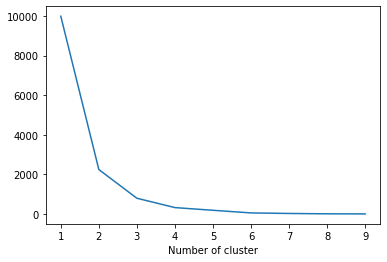

In [ ]:
sse={}
df_f = df_user[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_f)
    df_f["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['frequency']])
df_user['frequency_cluster'] = kmeans.predict(df_user[['frequency']])

#order the frequency cluster
df_user = order_cluster('frequency_cluster', 'frequency',df_user,True)
df_user


,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster
0,871766c5855e863f6eccc05f988b23cb,355,1,1,0
1,f5f088001070650f9e9a8cd773621f35,386,1,1,0
2,e883f26917e2095c439f70c2cf8c914b,356,1,1,0
3,13df7b623839b4edc579ee40279d57c8,393,1,1,0
4,b1f8d8ebab0d8174f573bb6797ba8240,439,1,1,0
...,...,...,...,...,...
93659,56c8638e7c058b98aae6d74d2dd6ea23,136,3,5,3
93660,83c6462cf9b51c26d6102ac0c48a1100,161,3,6,3
93661,595e38fad1949e25468ad1c7c06924d0,113,3,7,3
93662,473d9165586cfc6708841d07adf6c020,109,3,5,3


## Revenue

In [ ]:
#calculate revenue for each customer

df_revenue = df.groupby('customer_unique_id').total_money.sum().reset_index()
df_revenue = df_revenue.rename(columns={'total_money':'revenue'})
#merge it with our main dataframe
#tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

In [ ]:
df_user = pd.merge(df_user, df_revenue, on='customer_unique_id')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


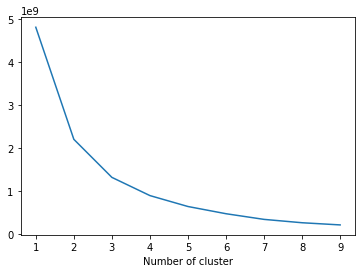

In [ ]:
sse={}
df_rev = df_user[['revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_rev)
    df_rev["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['revenue']])
df_user['revenue_cluster'] = kmeans.predict(df_user[['revenue']])

#order the frequency cluster
df_user = order_cluster('revenue_cluster', 'revenue',df_user,True)
df_user


,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,revenue,revenue_cluster
0,871766c5855e863f6eccc05f988b23cb,355,1,1,0,72.19,0
1,f5f088001070650f9e9a8cd773621f35,386,1,1,0,112.71,0
2,e883f26917e2095c439f70c2cf8c914b,356,1,1,0,65.50,0
3,22b12c9c5bc6ba994b2423d87d3bb88a,412,1,1,0,80.79,0
4,3b776563843bf7cb5adb4e65296aefae,334,1,1,0,56.78,0
...,...,...,...,...,...,...,...
93659,fe81bb32c243a86b2f86fbf053fe6140,73,4,5,3,1590.76,3
93660,397b44d5bb99eabf54ea9c2b41ebb905,77,4,6,3,1756.53,3
93661,e015ce18751465bc79eeabbe3f0064d5,27,4,5,3,1253.03,3
93662,c8ed31310fc440a3f8031b177f9842c3,22,4,8,3,1157.28,3


In [ ]:
#df_user['overall_score'] = df_user['recency_cluster'] + df_user['frequency_cluster'] + df_user['revenue_cluster']
#df_user.groupby('overall_score')['recency','frequency','revenue'].mean()

In [ ]:
#df_user

In [ ]:
#(len(df_user[df_user['frequency']<2])/len(df_user.index))*100

In [ ]:
#df_user['segment'] = 'Inactive'
#df_user.loc[df_user['overall_score']>2,'segment'] = 'Cold' 
#df_user.loc[df_user['overall_score']>5,'segment'] = 'Hot' 
#df_user.loc[df_user['overall_score']>8,'segment'] = 'Active' 

In [ ]:
#df_user.segment.value_counts()

In [ ]:
#df_user=pd.merge(df_user,rev_mean,on='customer_unique_id')
#df_user.shape

In [ ]:
#df_user.head()

In [ ]:
#df_user.groupby('segment')['review_score'].mean()

In [ ]:
clv=pd.read_csv('CLV_pred.csv')
clv.head()

,customer_unique_id,frequency,recency,T,monetary_value,pred_num_transaction
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,116.0,0.0,0.02
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,119.0,0.0,0.02
2,0000f46a3911fa3c0805444483337064,0.0,0.0,542.0,0.0,0.01
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,326.0,0.0,0.01
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,293.0,0.0,0.01


In [ ]:
df_user=pd.merge(df_user,clv[['customer_unique_id','pred_num_transaction']],on='customer_unique_id')
df_user

,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,revenue,revenue_cluster,pred_num_transaction
0,871766c5855e863f6eccc05f988b23cb,355,1,1,0,72.19,0,0.01
1,f5f088001070650f9e9a8cd773621f35,386,1,1,0,112.71,0,0.01
2,e883f26917e2095c439f70c2cf8c914b,356,1,1,0,65.50,0,0.01
3,22b12c9c5bc6ba994b2423d87d3bb88a,412,1,1,0,80.79,0,0.01
4,3b776563843bf7cb5adb4e65296aefae,334,1,1,0,56.78,0,0.01
...,...,...,...,...,...,...,...,...
93659,fe81bb32c243a86b2f86fbf053fe6140,73,4,5,3,1590.76,3,3.37
93660,397b44d5bb99eabf54ea9c2b41ebb905,77,4,6,3,1756.53,3,3.05
93661,e015ce18751465bc79eeabbe3f0064d5,27,4,5,3,1253.03,3,0.03
93662,c8ed31310fc440a3f8031b177f9842c3,22,4,8,3,1157.28,3,0.03


In [ ]:
df_user['pred_num_transaction']=df_user['pred_num_transaction'].apply(lambda x: round(x))

In [ ]:
df_user['pred_num_transaction']

0        0
1        0
2        0
3        0
4        0
        ..
93659    3
93660    3
93661    0
93662    0
93663    3
Name: pred_num_transaction, Length: 93664, dtype: int64

In [ ]:
df_user.head()

,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,revenue,revenue_cluster,pred_num_transaction
0,871766c5855e863f6eccc05f988b23cb,355,1,1,0,72.19,0,0
1,f5f088001070650f9e9a8cd773621f35,386,1,1,0,112.71,0,0
2,e883f26917e2095c439f70c2cf8c914b,356,1,1,0,65.50,0,0
3,22b12c9c5bc6ba994b2423d87d3bb88a,412,1,1,0,80.79,0,0
4,3b776563843bf7cb5adb4e65296aefae,334,1,1,0,56.78,0,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


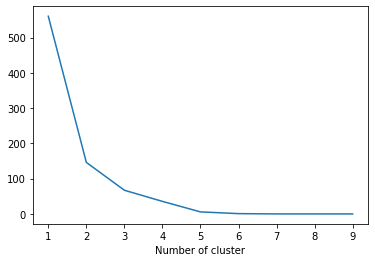

In [ ]:
sse={}
df_trans = df_user[['pred_num_transaction']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_trans)
    df_trans["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['pred_num_transaction']])
df_user['pred_num_transaction_cluster'] = kmeans.predict(df_user[['pred_num_transaction']])

#order the frequency cluster
df_user = order_cluster('pred_num_transaction_cluster', 'pred_num_transaction',df_user,True)
df_user


,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,revenue,revenue_cluster,pred_num_transaction,pred_num_transaction_cluster
0,871766c5855e863f6eccc05f988b23cb,355,1,1,0,72.19,0,0,0
1,f5f088001070650f9e9a8cd773621f35,386,1,1,0,112.71,0,0,0
2,e883f26917e2095c439f70c2cf8c914b,356,1,1,0,65.50,0,0,0
3,22b12c9c5bc6ba994b2423d87d3bb88a,412,1,1,0,80.79,0,0,0
4,3b776563843bf7cb5adb4e65296aefae,334,1,1,0,56.78,0,0,0
...,...,...,...,...,...,...,...,...,...
93659,ca77025e7201e3b30c44b472ff346268,93,4,9,3,1122.72,2,5,3
93660,fe81bb32c243a86b2f86fbf053fe6140,73,4,5,3,1590.76,3,3,3
93661,397b44d5bb99eabf54ea9c2b41ebb905,77,4,6,3,1756.53,3,3,3
93662,3e43e6105506432c953e165fb2acf44c,187,3,13,3,1172.67,3,3,3


In [ ]:
df_user['overall_score'] = df_user['recency_cluster'] + df_user['frequency_cluster'] + df_user['revenue_cluster']+\
df_user['pred_num_transaction_cluster']
df_user.groupby('overall_score')['recency','frequency','revenue','pred_num_transaction'].mean()

,recency,frequency,revenue,pred_num_transaction
overall_score,,,,
0,515.185319,1.000000,85.091765,0.000000
1,407.221698,1.019102,117.203111,0.000000
2,291.572017,1.032957,127.004684,0.000000
3,189.476333,1.044774,143.684521,0.000000
4,95.795397,1.069771,168.381899,0.000096
5,92.669516,1.247025,362.430846,0.001173
6,85.389215,1.609027,644.077427,0.011137
7,78.440281,2.072600,1066.429719,0.056206
8,82.622449,3.051020,1291.193061,0.408163


In [ ]:
df_user['segment'] = 'Inactive'
df_user.loc[df_user['overall_score']>3,'segment'] = 'Cold' 
df_user.loc[df_user['overall_score']>6,'segment'] = 'Hot' 
df_user.loc[df_user['overall_score']>9,'segment'] = 'Active' 

In [ ]:
df_user.segment.value_counts()

Inactive    64580
Cold        28484
Hot           557
Active         43
Name: segment, dtype: int64

In [ ]:
df_user

,customer_unique_id,recency,recency_cluster,frequency,frequency_cluster,revenue,revenue_cluster,pred_num_transaction,pred_num_transaction_cluster,overall_score,segment
0,871766c5855e863f6eccc05f988b23cb,355,1,1,0,72.19,0,0,0,1,Inactive
1,f5f088001070650f9e9a8cd773621f35,386,1,1,0,112.71,0,0,0,1,Inactive
2,e883f26917e2095c439f70c2cf8c914b,356,1,1,0,65.50,0,0,0,1,Inactive
3,22b12c9c5bc6ba994b2423d87d3bb88a,412,1,1,0,80.79,0,0,0,1,Inactive
4,3b776563843bf7cb5adb4e65296aefae,334,1,1,0,56.78,0,0,0,1,Inactive
...,...,...,...,...,...,...,...,...,...,...,...
93659,ca77025e7201e3b30c44b472ff346268,93,4,9,3,1122.72,2,5,3,12,Active
93660,fe81bb32c243a86b2f86fbf053fe6140,73,4,5,3,1590.76,3,3,3,13,Active
93661,397b44d5bb99eabf54ea9c2b41ebb905,77,4,6,3,1756.53,3,3,3,13,Active
93662,3e43e6105506432c953e165fb2acf44c,187,3,13,3,1172.67,3,3,3,12,Active


In [ ]:
df_user.to_csv('cust_segments.csv')

In [ ]:
df

,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New
2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing
3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New
4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100481,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,4aa6014eceb682077f9dc4bffebc05b0,343.40,housewares,0c9aeda10a71f369396d0c04dce13a64,delivered,2018-04-23 13:57:06,5,201802,2018-04-23 13:57:06,201802,New
100482,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,32e07fd915822b0765e448c4dd74c828,386.53,computers_accessories,0da9fe112eae0c74d3ba1fe16de0988b,delivered,2018-07-14 10:26:46,5,201803,2018-07-14 10:26:46,201803,New
100483,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,72a30483855e2eafc67aee5dc2560482,116.85,sports_leisure,cd79b407828f02fdbba457111c38e4c4,delivered,2017-10-23 17:07:56,5,201704,2017-10-23 17:07:56,201704,New
100484,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,9c422a519119dcad7575db5af1ba540e,64.71,computers_accessories,eb803377c9315b564bdedad672039306,delivered,2017-08-14 23:02:59,5,201703,2017-08-14 23:02:59,201703,New


In [ ]:
df.shape

(100486, 13)

In [ ]:
df.customer_unique_id.nunique()

93664

In [ ]:
df_user.shape

(93664, 11)

In [ ]:
df=pd.merge(df,df_user[['customer_unique_id','overall_score','segment']],on='customer_unique_id',how='left')
df.shape

(100486, 15)

In [ ]:
df.head()

,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New,1,Inactive
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New,3,Inactive
2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing,3,Inactive
3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New,3,Inactive
4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New,4,Cold


In [ ]:
#df.to_csv('for_recommendation.csv')

In [ ]:
df_model=df_user[['recency','frequency','revenue','pred_num_transaction','overall_score','segment']]

In [ ]:
df_model.head()

,recency,frequency,revenue,pred_num_transaction,overall_score,segment
0,355,1,72.19,0,1,Inactive
1,386,1,112.71,0,1,Inactive
2,356,1,65.50,0,1,Inactive
3,412,1,80.79,0,1,Inactive
4,334,1,56.78,0,1,Inactive


In [ ]:
#df_user=pd.merge(df_user,rev_mean,on='customer_unique_id')
#df_user.shape

In [ ]:
X=df_model.drop(['segment'],axis=1)
Y=df_model['segment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=15, random_state=42) # k=10, split the data into 10 equal parts
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,\
BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest',\
             'Gradient Boosting','XGBoost','Bagging']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=9),\
        DecisionTreeClassifier(criterion='entropy',random_state=72,max_leaf_nodes=8,\
                          min_samples_leaf=5, max_depth=4),GaussianNB(),\
        RandomForestClassifier(n_estimators=500),XGBClassifier(n_estimators=1000),\
       GradientBoostingClassifier(n_estimators=500),BaggingClassifier(n_estimators=500)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

,CV Mean,Std
Logistic Regression,0.993501,0.000763
KNN,0.978407,0.002367
Decision Tree,1.000000,0.000000
Naive Bayes,0.957347,0.003787
Random Forest,1.000000,0.000000
Gradient Boosting,1.000000,0.000000
XGBoost,1.000000,0.000000
Bagging,1.000000,0.000000
